In [1]:
import pygmt
import pandas as pd
import geopandas as gpd
data = pd.read_excel(r'C:\Users\ASUS\Desktop\Angel_Project\B_Scapp_GMT\sismicidad_historicam.xlsx', sheet_name = 'sismicidad_copiada')
limites_departamentales = gpd.read_file(r'C:\Users\ASUS\Desktop\Angel_Project\B_Scapp_GMT\Limites_Municipales_IGAC\Depto\Depto.shp')
drenajes_dobles = gpd.read_file(r'C:\Users\ASUS\Desktop\Angel_Project\B_Scapp_GMT\Carto500000_Colombia_SD_2016_shp\Drenaje_Doble.shp')
#enlace1 = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTQ6b2NzuHpobOaNui9BkSsX1CuOW8kN1uoGc-alranXUK9zpfkc9vgIq4eEKKDTg/pub?output=xlsx'
#data = pd.read_excel(enlace1, sheet_name = 'sismicidad_copiada')
data = data[['Fecha', 'Epicentro Latitud', 'Epicentro Longitud', 'Magnitud', 'Profundidad', 'Area epicentral']]
data = data.rename(columns = {'Epicentro Latitud': 'Latitud', 'Epicentro Longitud': 'Longitud', 'Area epicentral': 'Lugar'})
data = data.dropna(subset=['Latitud', 'Longitud', 'Magnitud', 'Profundidad'])
print(data)

         Fecha  Latitud  Longitud  Magnitud  Profundidad  \
0   1644/01/16    7.370   -72.640       6.5         15.0   
1   1644/03/16    4.460   -74.040       5.5         15.0   
2   1646/04/03    5.520   -74.130       6.0         15.0   
3   1736/02/02    2.500   -76.500       6.0         15.0   
4   1743/10/18    4.440   -73.830       6.2         15.0   
..         ...      ...       ...       ...          ...   
78  2014/10/20    0.757   -77.949       5.8         10.0   
79  2015/03/10    6.825   -73.134       6.4        157.7   
80  2016/10/30    3.405   -74.636       5.3         13.2   
81  2020/04/15    9.017   -74.486       5.8         50.0   
82  2023/08/17    4.420   -73.630       6.1         13.0   

                                   Lugar  
0           Pamplona, Norte de Santander  
1                 Chipaque, Cundinamarca  
2                           Muzo, Boyacá  
3                         Popayán, Cauca  
4                  Fómeque, Cundinamarca  
..                   

In [ ]:
print(limites_departamentales.crs)
print(limites_departamentales.total_bounds)
print(limites_departamentales.head())

In [ ]:
print(drenajes_dobles.crs)
print(drenajes_dobles.total_bounds)
print(drenajes_dobles.head())

In [2]:
lim_dpt_pro = limites_departamentales.to_crs('EPSG:4686')
dre_dobles = drenajes_dobles.to_crs('EPSG:4686')

In [ ]:
print(lim_dpt_pro.crs)
print(lim_dpt_pro.total_bounds)
print(lim_dpt_pro.head())

In [ ]:
print(dre_dobles.crs)
print(dre_dobles.total_bounds)
print(dre_dobles.head())

In [7]:
# Set the region for the plot to be slightly larger than the data bounds.

place = [
    data.Longitud.min() - 1,
    data.Longitud.max() + 1,
    data.Latitud.min() - 1,
    data.Latitud.max() + 1,
]
print(place)
print(data.Longitud.min() - 1)
print(data.Longitud.max() + 1)
print(data.Latitud.min() - 1)
print(data.Latitud.max() + 1)

[np.float64(-82.52), np.float64(-70.08), np.float64(-0.47), np.float64(13.61)]
-82.52
-70.08
-0.47
13.61


In [3]:
#Grilla del relieve
#grid = pygmt.datasets.load_earth_relief(resolution="01m", region=place, registration="gridline")
grid = pygmt.datasets.load_earth_relief(resolution="01m", region="CO", registration="gridline")

In [4]:
#Sombras del relieve
shade = pygmt.grdgradient(grid=grid, azimuth="0/300", normalize="t1")

In [ ]:
fig = pygmt.Figure()
fig.grdimage(grid=grid, frame="a2f2", projection="M10c", cmap="oleron", dpi=300, shading=shade)
#fig.basemap(region="CO", projection="M10c", frame=True)
fig.basemap(region=place, projection="M10c", frame=True)
#fig.coast(shorelines = True, land="lightgreen", water="skyblue", borders="1/0.5p")
fig.coast(shorelines = True, borders="1/0.5p")
fig.plot(x=data.Longitud, y=data.Latitud, style="c0.3c", fill="white", pen="black")
fig.show()

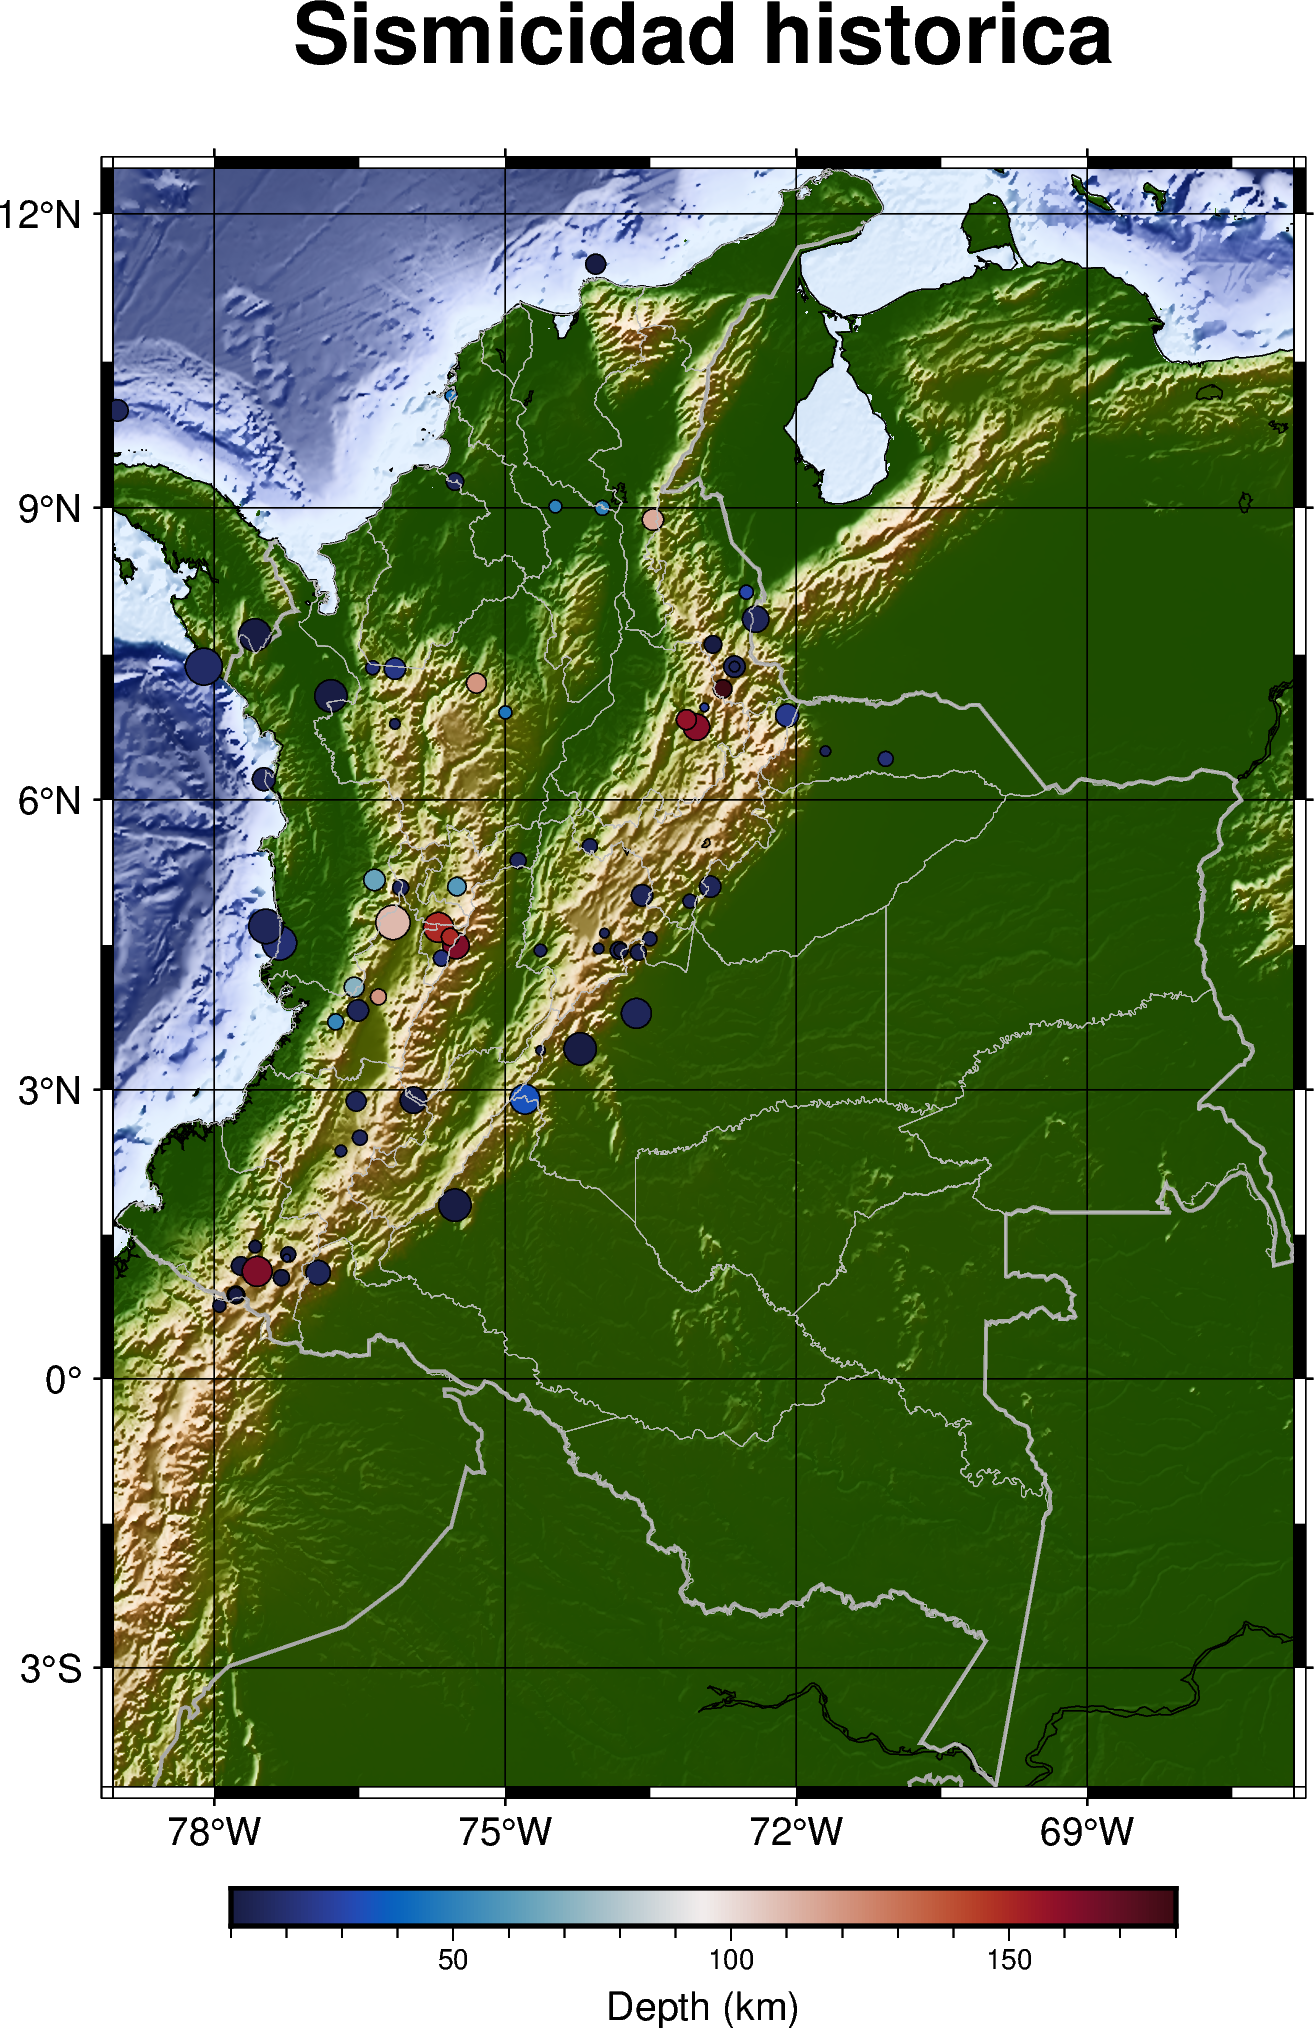

In [7]:
fig = pygmt.Figure()
fig.grdimage(grid=grid, projection="M10c", cmap="oleron", dpi=300, shading=shade)
#fig.grdimage(grid=grid, projection="M10c", cmap="elevation", dpi=300, shading=shade)
fig.basemap(region="CO", projection="M10c", frame=["WSne+tSismicidad historica", "xa3f1.5g3+lxlongitud", "ya3f1.5g3+lylatitud"])
#fig.basemap(region=place, projection="M10c", frame=["WSne+tSismicidad historica", "xa2f1g2+lxlongitud", "ya2f1g2+lylatitud"]) 
fig.coast(shorelines = True, borders="1/0.8p darkgray", resolution="i")
#fig.coast(shorelines = True, borders="1/0.8p black", water='#bdd8fe', rivers='skyblue', lakes='lightblue', resolution="i")
pygmt.makecpt(cmap="cmocean/balance", series=[data.Profundidad.min(), data.Profundidad.max()])
fig.plot(x=data.Longitud, y=data.Latitud, size=0.002 * 2**data.Magnitud, fill=data.Profundidad, cmap=True, style="cc", pen="black",)
fig.colorbar(frame="xaf+lDepth (km)")
fig.plot(lim_dpt_pro, pen="0.1p,gray")
#fig.plot(dre_dobles, pen="0.1p,skyblue")
fig.show()


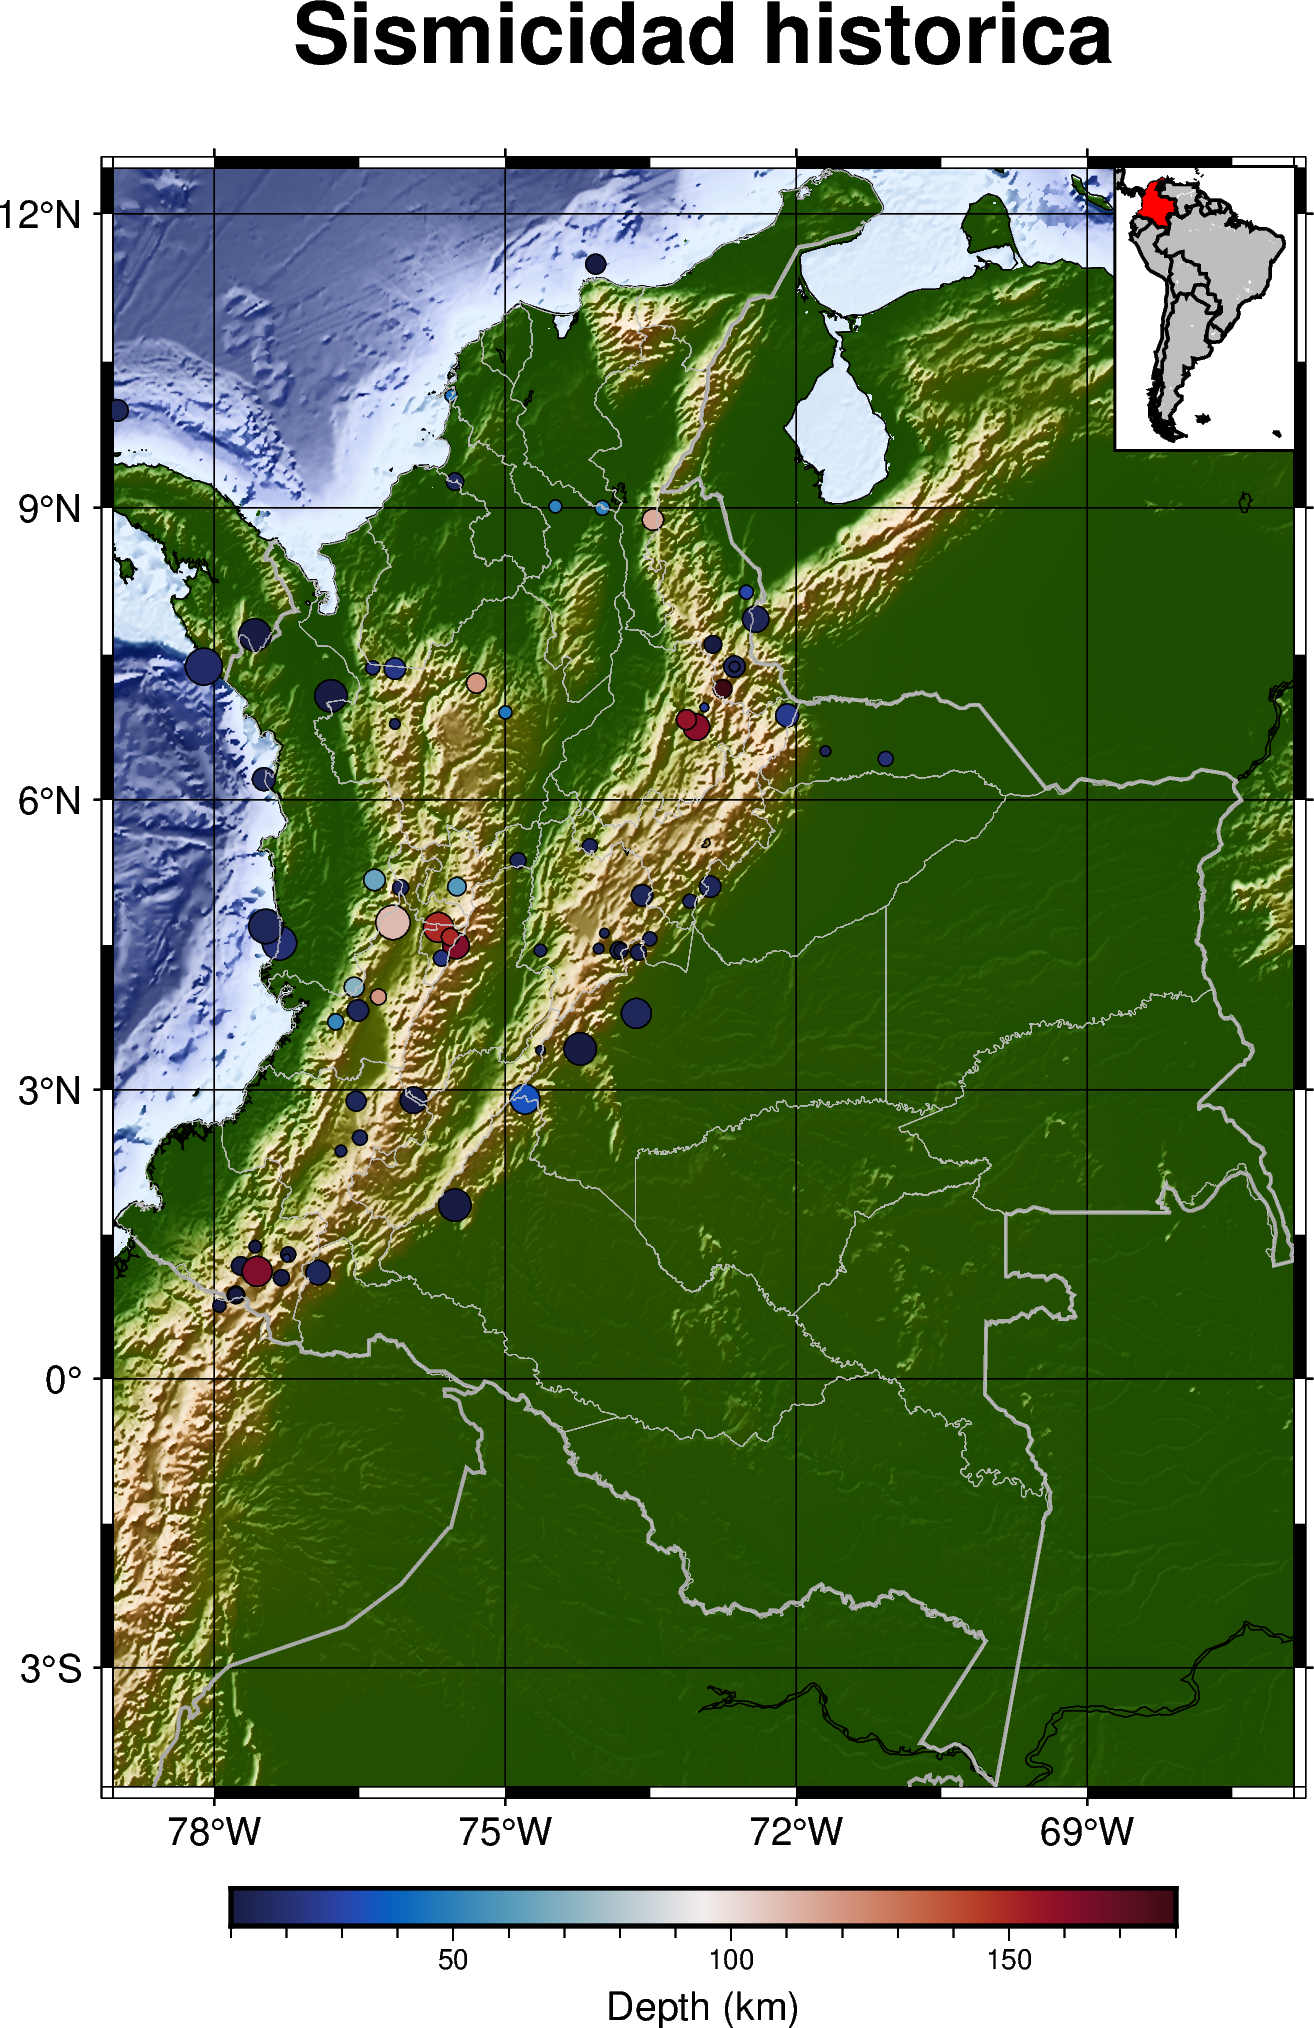

In [8]:
with fig.inset(
    position="jTR",
    box="+pblack",
    region=[-85.33, -31.80, -56.90, 15.46],
    projection="M1.5c",
):
    # Use a plotting method to create a figure inside the inset.
    fig.coast(
        land="gray",
        borders=1,
        shorelines="1/thin",
        water="white",
        # Use dcw to selectively highlight an area
        dcw="CO+gred",
    )

# Add graphic scale
#fig.basemap(map_scale="jBL+w100+o0.5c/1.5c+f+lkm")

fig.show()

In [ ]:

fig.image(imagefile=r'C:\Users\ASUS\Desktop\Angel_Project\B_Scapp_GMT\Legenda_inset.JPG',position="jBR+w2.5c",)
'''
with fig.inset(position="jBR+w2.5c", box="+pblack+gwhite"):
    # pass is used to exit the with statement as no plotting methods are
    # called
    pass
'''
#fig.show()


fig.plot(x=-68.1, y=-2.03, style="c0.145c")
fig.plot(x=-68.1, y=-2.25, style="c0.145c")
fig.plot(x=-68.1, y=-2.47, style="c0.145c")
fig.plot(x=-68.1, y=-2.69, style="c0.145c")
fig.plot(x=-68.1, y=-2.91, style="c0.145c")
fig.show()

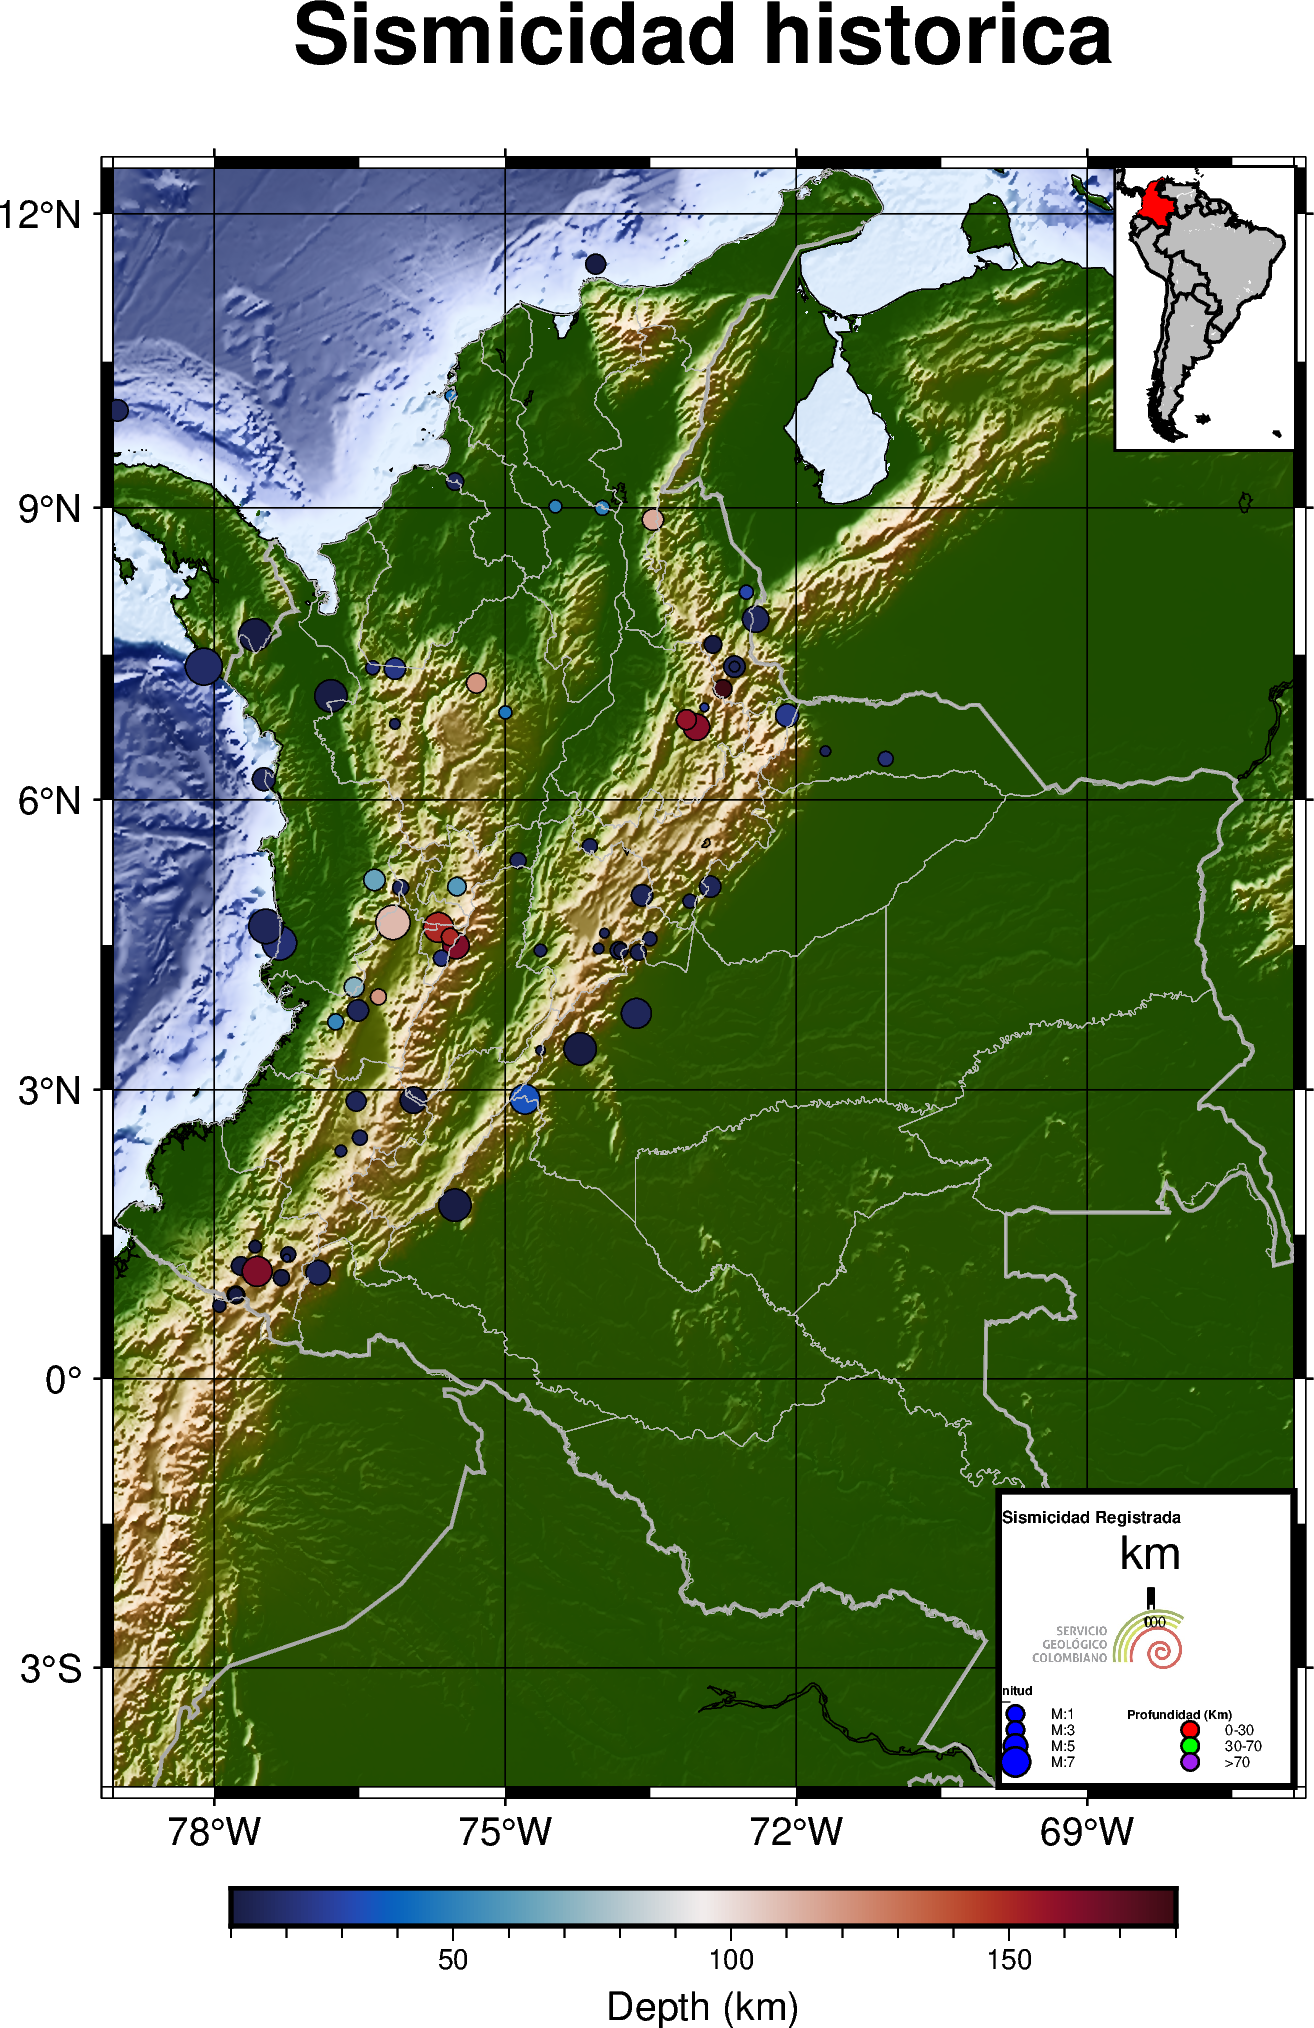

In [9]:
# Set the font size globally for legend labels
pygmt.config(FONT_ANNOT_PRIMARY="3.5p,Helvetica,black")

logo_path = r"C:\Users\ASUS\Desktop\Angel_Project\B_Scapp_GMT\logo_SGC.jpg"  # Path to logo
legend_file_path1 = r"C:\Users\ASUS\Desktop\Angel_Project\B_Scapp_GMT\legend1.txt"
legend_file_path2 = r"C:\Users\ASUS\Desktop\Angel_Project\B_Scapp_GMT\legend2.txt"
legend_file_path3 = r"C:\Users\ASUS\Desktop\Angel_Project\B_Scapp_GMT\legend3.txt"
with open(legend_file_path1, "w") as legend_file1:
    legend_file1.write(
        """
H 4 Helvetica-Bold Sismicidad Registrada
"""
    )
with open(legend_file_path2, "w") as legend_file2:
    legend_file2.write(
        """
H 3 Helvetica-Bold Magnitud
D 0.001c 0.1p
S 0.001c c 0.15c blue 0.5p,black 0.3c M:1
S 0.001c c 0.15c blue 0.5p,black 0.3c M:3
S 0.001c c 0.2c blue 0.5p,black 0.3c M:5
S 0.001c c 0.25c blue 0.5p,black 0.3c M:7
"""
    )
    
with open(legend_file_path3, "w") as legend_file3:
    legend_file3.write(
        """
H 3 Helvetica-Bold Profundidad (Km)
S 0.001c c 0.15c red 0.5p,black 0.3c 0-30
S 0.001c c 0.15c green 0.5p,black 0.3c 30-70
S 0.001c c 0.15c purple 0.5p,black 0.3c >70
"""
    )

with fig.inset(
    position="jBR+w2.5c",
    box="+pblack+gwhite",
):
    # Use a plotting method to create a figure inside the inset.
    fig.legend(spec=legend_file_path1, position="jTC+w0.1c", box=False)
    fig.image(imagefile=logo_path, position="jCR+w1.3c", transparency=20)
    fig.legend(spec=legend_file_path2, position="jBL+w0.1c", box=False)
    fig.legend(spec=legend_file_path3, position="jBR+w0.1c", box=False)
    fig.basemap(map_scale="jBC+w100+o0.5c/1.5c+f+lkm")
  
fig.show()